In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux, getspectrafunc
from utils import log10eaxis, logjacob, makedist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import special
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
sys.path.append("BFCalc")


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logmassaxis = np.linspace(-1,2,15)
colormap = cm.get_cmap('cool')

gridtointerpolate   = np.load(f"BFCalc/griddata/channel=b_massenergy_diffflux_grid.npy")
massvalues          = np.array(np.load(f"BFCalc/griddata/massvals_massenergy_diffflux_grid.npy"))
log10xvals        = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")

log10massvals = np.log10(massvalues)-3
gridtointerpolate

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2966914514.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [4.10517119e+00, 3.97644319e+00, 3.84543215e+00, ...,
        1.31400894e-07, 8.88485578e-08, 6.16119105e-08],
       [3.49801982e+00, 3.41892126e+00, 3.38142276e+00, ...,
        8.67136554e-08, 5.87862341e-08, 4.01201242e-08],
       [3.39107839e+00, 3.42814497e+00, 3.56227681e+00, ...,
        4.77854570e-08, 3.23265813e-08, 2.14454615e-08]])

In [3]:
DM_spectrum_setup(-1.0, normeaxis=10**log10eaxis)([-1.0,-0.99])

/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:36: RuntimeWarning: divide by zero encountered in log
  logyvals = np.log(getspectrafunc(mDM=mDM, channel="b")(eaxis))


array([-inf, -inf])

In [4]:
spectravals = []
for logmass in notebook_tqdm(logmassaxis):
    tempfunc = DM_spectrum_setup(logmass, normeaxis=10**log10eaxis)
    
    singlerowspecvals = tempfunc(log10eaxis)
    
    spectravals.append(singlerowspecvals)
spectravals = np.array(spectravals)

100%|██████████| 15/15 [00:00<00:00, 788.77it/s]


In [5]:
print(special.logsumexp(spectravals[1,:]+logjacob))

-4.440892098500626e-16


In [6]:
spectravals[3,:]

array([ 4.26310459,  4.15473228,  4.05457814,  3.9472029 ,  3.83610137,
        3.72961318,  3.61041876,  3.50101626,  3.38297287,  3.26043645,
        3.14381092,  3.01176574,  2.89096013,  2.75941662,  2.62234347,
        2.49323788,  2.34495805,  2.21248955,  2.06765169,  1.91611651,
        1.77489906,  1.6104075 ,  1.46569071,  1.30643075,  1.13918899,
        0.98558949,  0.80403918,  0.64560242,  0.4695624 ,  0.28349759,
        0.11475679, -0.08835522, -0.26094029, -0.45350984, -0.65816731,
       -0.84068789, -1.06412991, -1.25063701, -1.46002653, -1.68398866,
       -1.88043626, -2.12515009, -2.32758968, -2.55726201, -2.80472654,
       -3.01661205, -3.285808  , -3.49881182, -3.73865255, -3.99615288,
       -4.20831486, -4.47795803, -4.67905286, -4.89819389, -5.12554597,
       -5.30129414, -5.51465801, -5.67422436, -5.84304393, -6.01819919,
       -6.17089112, -6.351174  , -6.47386366, -6.59610488,        -inf,
              -inf,        -inf,        -inf,        -inf,      

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/3588987128.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


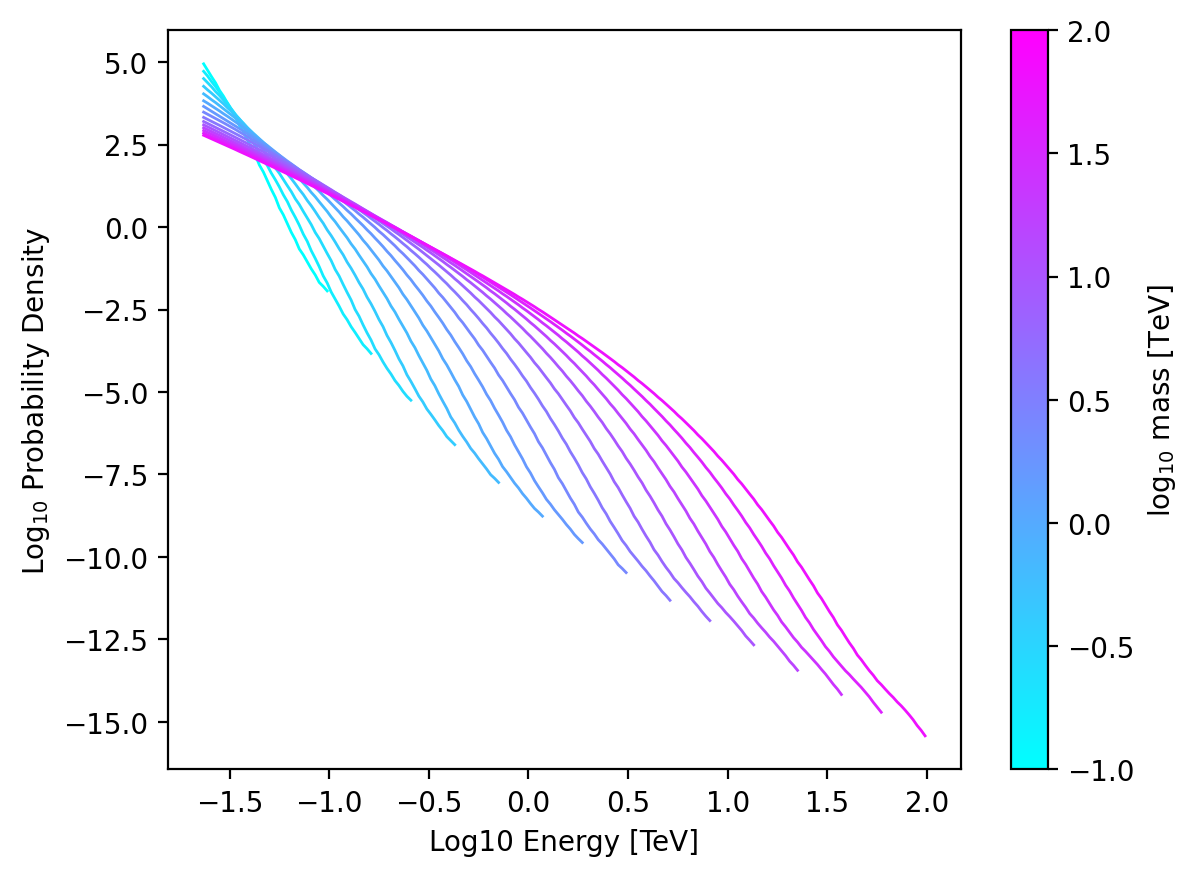

In [7]:
plt.figure(dpi=200)
# plt.pcolormesh(log10eaxis, logmassaxis, spectravals, label=logmass, lw=0.8)
logjacob = np.log(np.log(10))+np.log(log10eaxis[1]-log10eaxis[0])+np.log(10**log10eaxis)
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    
    
    single_spectravals = np.array(spectravals)[idx,:]
    plt.plot(log10eaxis, single_spectravals, color=color, lw=1.0)
    # plt.axvline(logmass, c=color, lw=0.8, linestyle='-')

# for logmassval in log10massvals:
#     plt.axvline(logmassval, c='tab:orange', lw=0.5, linestyle="--")
plt.xlabel('Log10 Energy [TeV]')

plt.ylabel(r'Log$_{10} $ Probability Density')
# plt.yscale('log')
# plt.xlim([-0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[0], 0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[-1]])
# plt.ylim([-8,0])

# plt.legend()
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2473672863.py:15: RuntimeWarning: divide by zero encountered in log
  np.log(gridtointerpolate).T)


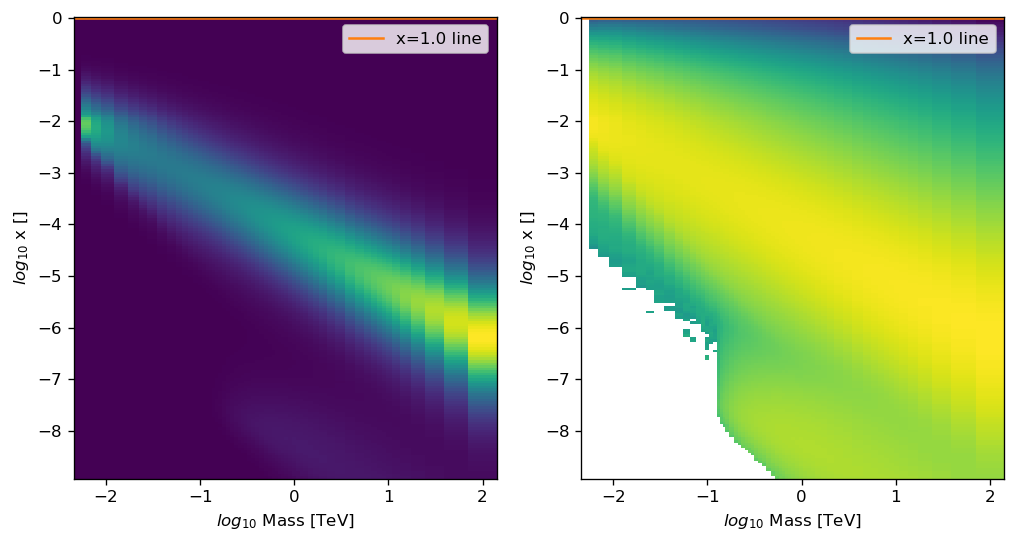

In [8]:
plt.figure(dpi=120,figsize=(10,5))
plt.subplot(1,2,1)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               (gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")

plt.legend()

plt.subplot(1,2,2)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               np.log(gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")

plt.legend()


In [9]:
log10massvals.shape

(62,)

In [10]:
gridtointerpolate[log10massvals<-1.,]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.17994787e-05, 1.30801598e-05, 9.14500095e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97511400e-05, 1.19141530e-05, 8.37645482e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.85103340e-05, 1.15053739e-05, 8.27572263e-06]])

In [11]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

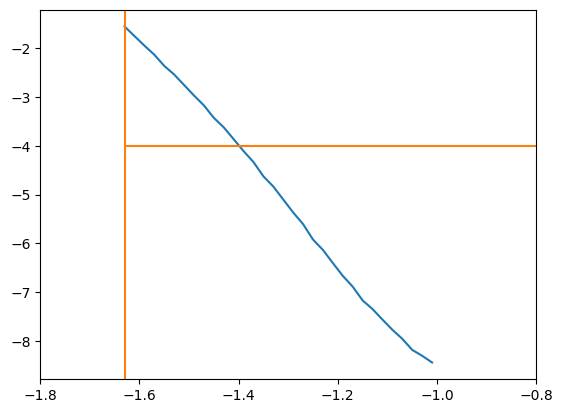

In [12]:
plt.figure()
plt.plot(log10eaxis, DM_spectrum_setup(-1.0)(log10eaxis))
plt.plot(log10eaxis, 0*log10eaxis-4, c="tab:orange")
plt.axvline(log10eaxis[0], c="tab:orange")
plt.xlim(-1.8,-0.8)
plt.show()

In [13]:
special.logsumexp(makedist(logmass=1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [14]:
special.logsumexp(DM_spectrum_setup(1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [15]:
log10xvals = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/635259384.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


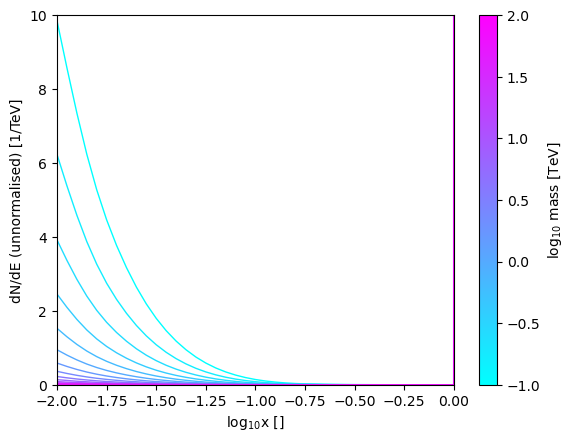

In [16]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])

    plt.plot(log10xvals, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass)), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel(r'log$_{10}$x []')
plt.ylabel('dN/dE (unnormalised) [1/TeV]')
plt.xlim([-2,0])
plt.ylim([0,10])
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/Users/lpin0002/Desktop/DMPipe/BFCalc/createspectragrids.py:101: RuntimeWarning: invalid value encountered in log10
  return lambda energy: func(np.log10(mDM), np.log10(energy/mDM))
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2062852981.py:4: RuntimeWarning: divide by zero encountered in log
  normvals = np.log(getspectrafunc(10**logmass, 'b')(log10eaxis))
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2062852981.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2062852981.py:7: RuntimeWarning: invalid value encountered in log
  plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2062852981.py:14: MatplotlibDeprecationWarning: Unable to 

-1.9381544280647596
-1.1943932816684044
-0.645167815575288
-0.2154816895407873
0.14405276665898564
0.4525549014609121
0.707513211981331
0.9519997708443787
1.1824574471605873
1.404280464701566
1.6204138549443827
1.8329877163894208
2.0376782440311847
2.231774700815446
2.3733571125636863


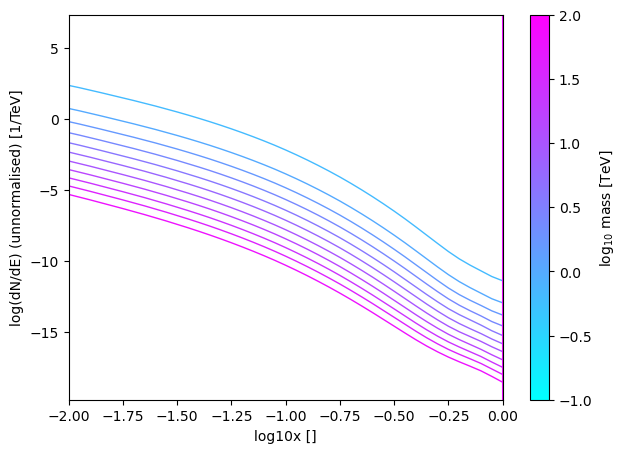

In [17]:
plt.figure(figsize=(7,5))
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    normvals = np.log(getspectrafunc(10**logmass, 'b')(log10eaxis))
    norm = special.logsumexp(normvals[~np.isnan(normvals)])
    print(norm)
    plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel('log10x []')
plt.ylabel('log(dN/dE) (unnormalised) [1/TeV]')
plt.xlim([-2,0])
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

0.04172152771504539
0.17421655706788364
0.526855894579375
1.2241167841689018
2.3206714947175104
3.8032843469020485
5.65509215918366
7.866893942854026
10.233252144410535
12.889985007315646
16.02272581963999
19.82440378131181
24.35149129200935
29.64129432822512
34.19395166972851


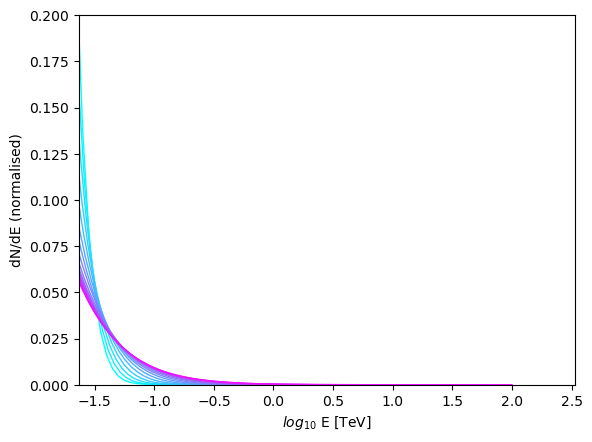

In [18]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = np.nansum(getspectrafunc(10**logmass, 'b')(10**log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10xvals+logmass, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/dN_dE_norm, color=color, lw=1.0)
plt.xlim([min(log10eaxis), max(log10eaxis)])
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'dN/dE (normalised)')

plt.ylim(0,0.2)
plt.show()

nan
nan
nan
nan
nan
6.829631331585213
6.669223897366203
6.417579616435868
6.1572308387070045
5.908786823247182
5.676518621846565
5.460273663457968
5.258800824263696
5.070708051281911
4.894722393312364


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/2468436761.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


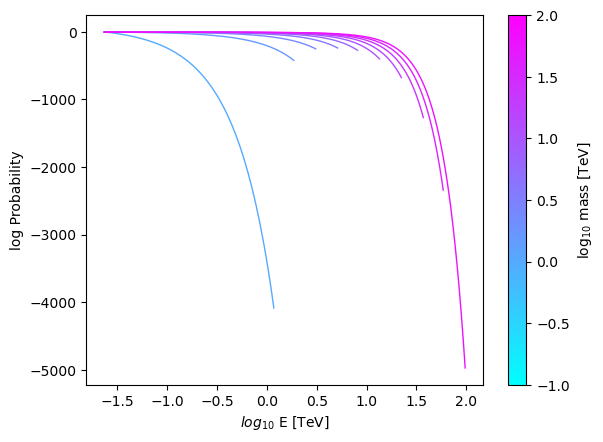

In [19]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = special.logsumexp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10eaxis, makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis)-dN_dE_norm, color=color, lw=1.0)
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'log Probability')
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

nan
nan
nan
nan
nan
6.829631331585213
6.669223897366203
6.417579616435868
6.1572308387070045


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_19564/3090158571.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


5.908786823247182
5.676518621846565
5.460273663457968
5.258800824263696
5.070708051281911
4.894722393312364


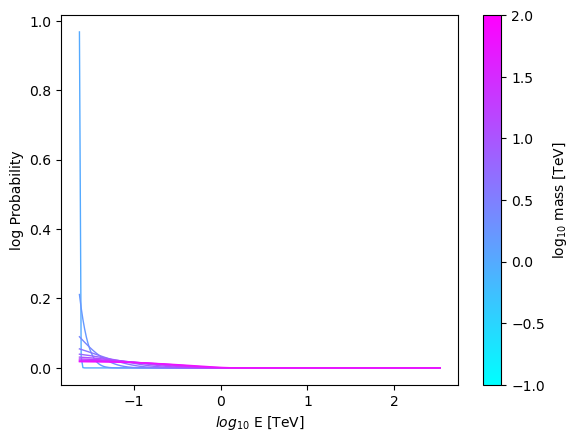

In [20]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = special.logsumexp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10eaxis, np.exp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis)-dN_dE_norm), color=color, lw=1.0)
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'log Probability')
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()